In [1]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

E:\anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
def parser(x):
    return datetime.strptime('1998-'+x, '%Y-%d-%b')

## Read the dataset

In [3]:
series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

In [4]:
series.head()

Month
1998-01-01    266.0
1998-02-01    145.9
1998-03-01    183.1
1998-04-01    119.3
1998-05-01    180.3
Name: Sales of shampoo over a three year period, dtype: float64

In [5]:
series.values

array([266. , 145.9, 183.1, 119.3, 180.3, 168.5, 231.8, 224.5, 192.8,
       122.9, 336.5, 185.9, 194.3, 149.5, 210.1, 273.3, 191.4, 287. ,
       226. , 303.6, 289.9, 421.6, 264.5, 342.3, 339.7, 440.4, 315.9,
       439.3, 401.3, 437.4, 575.5, 407.6, 682. , 475.3, 581.3, 646.9])

## Plot the dataset

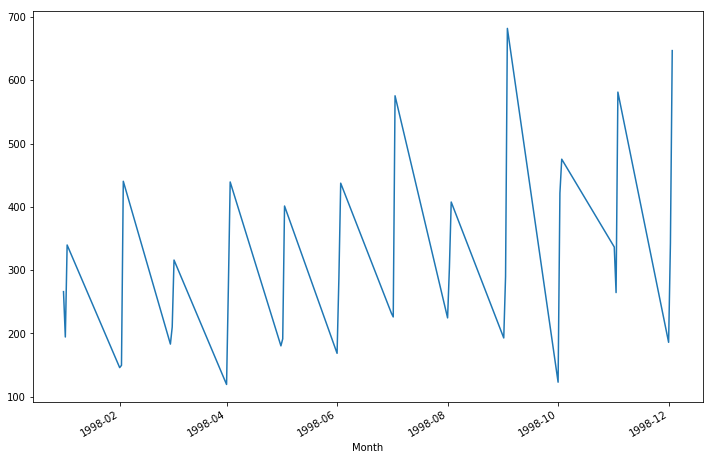

In [6]:
%matplotlib inline
series.plot(figsize=(12,8));

## Perform Durbin Watson test

In [7]:
import statsmodels.api as sm
sm.stats.durbin_watson(series)

0.09548538187456361

## Display ACF and PACF

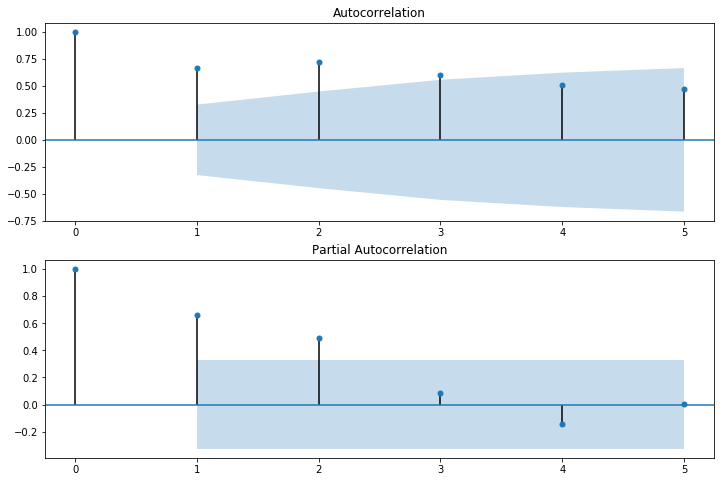

In [8]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(series.values.squeeze(), lags=5, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(series, lags=5, ax=ax2)

## Apply ARIMA model on dataset

In [9]:
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

E:\anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
E:\anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


                                          ARIMA Model Results                                          
Dep. Variable:     D.Sales of shampoo over a three year period   No. Observations:                   35
Model:                                          ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                                                css-mle   S.D. of innovations             64.241
Date:                                         Sun, 20 Jan 2019   AIC                            406.340
Time:                                                 21:36:24   BIC                            417.227
Sample:                                             02-01-1998   HQIC                           410.098
                                                  - 12-03-1998                                         
                                                        coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------

## Calculate Mean Squared Error

Split the dataset into train and test using 70:30 split. First Use the train set to fit the ARIMA model. Next, Used rolling forecast to the ARIMA model
    after each new test data is received. Calculated Mean Squared Error between List of forecasted values and test values


In [10]:
train_length = int(len(series.values) * 0.7)
train, test = series.values[0:train_length], series.values[train_length:len(series.values)]
rolling_train_data = [x for x in train]
predict_values = []
for k in range(len(test)):
    model = ARIMA(rolling_train_data, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    predict_values.append(output[0])
     
mse = mean_squared_error(test, predict_values)
print('Mean Squared Error:'+ str(mse))


E:\anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
E:\anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
E:\anaconda\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


Mean Squared Error:22600.411744629495
